In [10]:
import re
import json
import numpy as np
from matplotlib import pyplot as plt
from urllib.request import urlopen

In [11]:
def yt_replay_scrape(yt_url):
    # get html page of video
    page = urlopen(yt_url).read().decode("utf-8")

    # regex to pull out heatmap json
    heatmap_regex = r'"heatMarkers":\[[\{"heatMarkerRenderer":\{"timeRangeStartMillis":\d+,"markerDurationMillis":\d+,"heatMarkerIntensityScoreNormalized":\d+\.\d+\}\},?]+\]'

    # get heatmap json, throw error if video doesnt have heatmap
    heatmap_scrape = re.findall(heatmap_regex, page)
    if len(heatmap_scrape) == 0:
        raise Exception(f'No heatmap found in video: {yt_url}')
    heatmap = json.loads('{' + heatmap_scrape[0] + '}')

    # get replay data as x, y arrays
    x, y = [], []
    for heatMarker in heatmap['heatMarkers']:
        heatMarker = heatMarker['heatMarkerRenderer']
        x.append(heatMarker['timeRangeStartMillis'])
        y.append(heatMarker['heatMarkerIntensityScoreNormalized'])

    x = np.array(x) / 1000 # convert milliseconds to seconds
    y = np.array(y)

    return x, y


def plot_replay(x, y):
    plt.figure(figsize=(30, 5))
    plt.plot(x, y)
    plt.xlabel('Time (s)')
    plt.xlim(xmin=0)
    plt.ylim(ymin=0)
    plt.show()

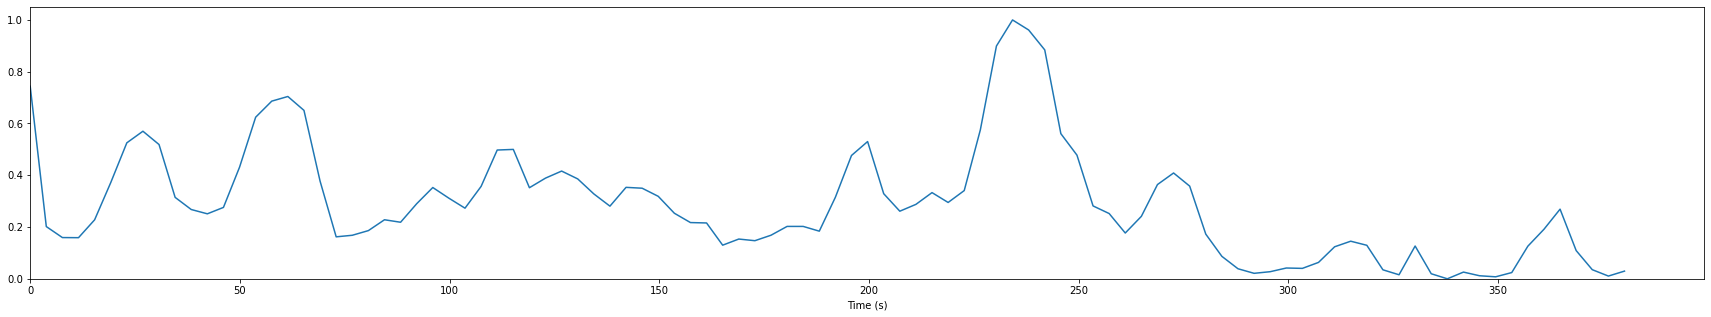

In [12]:
# demo
x, y = yt_replay_scrape('https://youtu.be/NBDaLK6EjwI')
plot_replay(x, y)